In [1]:
# Importamos la librerias que pueden ser útiles en el trabajo y las nombramos
# Importamos la base de datos que está en formato .csv

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import tree
diabetes= pd.read_csv(filepath_or_buffer="D:/Bases_de_datos/input/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes.dropna(inplace=True)

In [3]:
display(diabetes.info(),diabetes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# la pregunta hipótesis para ver si se acepta o no: valores normales para glucosa se según medicina que es entre 100 a 125 en un estado normal, por lo cual usaremos 120 como valor base y una desviación estandar de 0.3 para encontrar una correlación
H0_mean,H0_std=120,0.3
# hallamos la media y desviación estándar para la variable de glucosa
glucose_mean = round(diabetes.Glucose.mean(),1)
glucose_std= round(diabetes.Glucose.std(),1)
# hallamos el valor de alpha que es de 0.05 para una significancia del 95%
c = 0.95
alpha = 1 - c 
# hallamos el número total de elementos
n=len(diabetes.Glucose)
# hallamos el error stándar
se = glucose_std/np.sqrt(n)
# calculamos z test como prueba estadística para nuestra base de datos de +50 datos y calculamos las medias
z = (glucose_mean-H0_mean)/se
print("el valor z es {}".format(z))
# importamos scipy para poder hallar el pvalue
import scipy
pval= 2 * scipy.stats.norm.sf(abs(z))
print ("el valor p value es igual a {}".format((pval)))
# para contrastar creamos un if muy sencillo que compara si pvalue es menor o no a alpha que lo definimos como 1-c
if pval<alpha:
    print("Se rechaza H0")
else:
    print("No se rechaza H0")

print("los valores redondeados son:", "para pvalue",round(pval,3),"y para z es",round(z,3))
# para pval<alpha tenemos que se rechaza la hipótesis

el valor z es 0.7794228634059996
el valor p value es igual a 0.43573066003173366
No se rechaza H0
los valores redondeados son: para pvalue 0.436 y para z es 0.779


> Conclusión tenemos que para nuestra hipótesis nula (H0) sí existe una correlación
> pvalue igual a 0.436 indica que para para el 43.6% de los casos la H0 se mantendrá siendo **CIERTA** y para el restante 66.4% de los casos será falsa.

sklearn.linear_model._base.LinearRegression

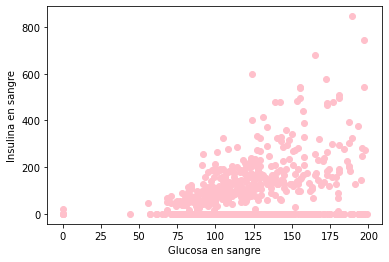

In [5]:
# establecemos las variables que pueden ser interesantes en el estudio, mencionar que en el eje de las y se pondría la variable
# dependiente que se buscaría predecir y en el eje de las x la variable independiente
Presion=diabetes.BloodPressure
Insulina=diabetes.Insulin
Glucosa=diabetes.Glucose
Outcome= diabetes.Outcome

# sacar el diagrama de dispersión
plt.ylabel("Insulina en sangre")
plt.xlabel("Glucosa en sangre")
plt.scatter(Glucosa,Insulina,color="pink")
#importar la librería para el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

In [6]:
# calculando el límite superior e inferior para eliminar outliers
upper_limit_glucosa=Glucosa.mean() + 3*Glucosa.std()
lower_limit_glucosa=Glucosa.mean() - 3*Glucosa.std()
print("límite superior:",upper_limit_glucosa)
print("límite inferior:",lower_limit_glucosa)

límite superior: 216.81238583540866
límite inferior: 24.976676664591338


In [7]:
#encontrando los outliers
diabetes.loc[(Glucosa>upper_limit_glucosa)|(Glucosa<lower_limit_glucosa)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
# trimming, eliminando los outliners
clean_glucose= diabetes.loc[(Glucosa<upper_limit_glucosa)&(Glucosa>lower_limit_glucosa)]
print("old data before removing outliners",len(Glucosa))
print("new data after removing outliners",len(clean_glucose))
print("outliers removed",len(Glucosa)-len(clean_glucose))

old data before removing outliners 768
new data after removing outliners 763
outliers removed 5


In [9]:
# haciendo el código para el modelo de regresión lineal
from sklearn import linear_model
regresion= linear_model.LinearRegression()
clean_glucose1=diabetes.Glucose.values.reshape((-1,1))
modelo=regresion.fit(clean_glucose1,Insulina)
# usando la función intercept_ para hallar la pendiente
print("Intersección en (b)",modelo.intercept_)
# usando la función coef_ para hallar la pendiente
print("Pendiente (m)",modelo.coef_)
entrada = [[1],[24],[120],[200]]
modelo.predict(entrada)

Intersección en (b) -64.59250372569905
Pendiente (m) [1.19436323]


array([-63.3981405 , -35.92778619,  78.73108393, 174.28014237])

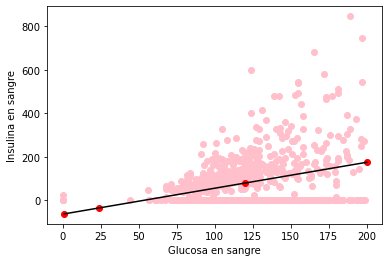

In [10]:
plt.ylabel("Insulina en sangre")
plt.xlabel("Glucosa en sangre")
plt.scatter(Glucosa,Insulina,color="pink")
plt.scatter(entrada,modelo.predict(entrada),color="red")
plt.plot(entrada,modelo.predict(entrada),color="black")
plt.show()

In [11]:
#Separando la información en grupos de entrenamiento y otro de prueba para el MSE, error cuadrático medio
X_train, X_test, y_train, y_test = train_test_split(Glucosa.to_numpy(),Insulina.to_numpy(), test_size=0.25, random_state=5)

#linear regression model
linear_reg = LinearRegression()
#decision tree model
decision_tree = tree.DecisionTreeRegressor()

#fit/predict data
linear_reg.fit(X_train.reshape(-1, 1), y_train)
decision_tree = decision_tree.fit(X_train.reshape(-1, 1),y_train)
linreg_glucose = linear_reg.predict(X_test.reshape(-1, 1))
d_tree_glucose = decision_tree.predict(X_test.reshape(-1, 1))
df_predict = pd.DataFrame({'Glucosa':X_test,'Insulina':y_test,'Glucosa Prevista de Regresión lineal':linreg_glucose, 'Decision Tree Predicted Glucosa':d_tree_glucose})
df_predict
     

,Glucosa,Insulina,Glucosa Prevista de Regresión lineal,Decision Tree Predicted Glucosa
0,92,126,48.981144,43.000000
1,132,0,95.028190,0.000000
2,106,0,65.097610,62.222222
3,99,0,57.039377,51.125000
4,96,49,53.585849,22.333333
...,...,...,...,...
187,197,744,169.854638,181.000000
188,168,0,136.470530,160.500000
189,132,0,95.028190,0.000000
190,179,0,149.133468,72.250000


In [12]:
df_predict['Forecast Error Lin Reg'] = df_predict['Glucosa'] - df_predict['Glucosa Prevista de Regresión lineal']
df_predict['Forecast Error Decision Tree'] = df_predict['Glucosa'] - df_predict['Decision Tree Predicted Glucosa']
df_predict
     

,Glucosa,Insulina,Glucosa Prevista de Regresión lineal,Decision Tree Predicted Glucosa,Forecast Error Lin Reg,Forecast Error Decision Tree
0,92,126,48.981144,43.000000,43.018856,49.000000
1,132,0,95.028190,0.000000,36.971810,132.000000
2,106,0,65.097610,62.222222,40.902390,43.777778
3,99,0,57.039377,51.125000,41.960623,47.875000
4,96,49,53.585849,22.333333,42.414151,73.666667
...,...,...,...,...,...,...
187,197,744,169.854638,181.000000,27.145362,16.000000
188,168,0,136.470530,160.500000,31.529470,7.500000
189,132,0,95.028190,0.000000,36.971810,132.000000
190,179,0,149.133468,72.250000,29.866532,106.750000


In [13]:
# creando el cálculo para el coeficiente de correlación para las variables glucosa e insulina
np.corrcoef(Glucosa,Insulina)

array([[1.        , 0.33135711],
       [0.33135711, 1.        ]])

In [14]:
# correlación de pearson
from scipy.stats import pearsonr
pearsonr(Glucosa,Insulina)


(0.33135710992020906, 3.882623944270335e-21)

In [15]:
# coeficiente de determinación nos indica cuánto de la variación total en Y se debe a la variación en X, el coeficiente de determinación
# también se puede tomar con el coeficiente de correlación de pearson al cuadrado
coe_det=0.33135710992020906**2
coe_det

0.10979753429467351

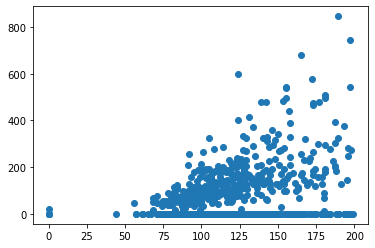

In [16]:
plt.scatter(Glucosa,Insulina)
plt.show()

### Conclusión de la parte de regresión lineal: ###
tenemos que hay una relación entre las variables insulina y glucosa, y esta se interpreta como una relación directamente proporcional en la que a mayor insulina en sangre mayor glucosa en sangre, esta relación se podría abarcar hasta el punto de si es o no diabético y si se relaciona con ese resultado. Por otra parte, tenemos que el coeficiente de correlación es de 0.33, significando que no es cercano a uno, sino más bien cercano a 0, por lo tanto podríamos decir que la relación no es especialmente significativa para la investigación en curso.

In [17]:
# regresión logística
# el train split se hizo en un punto anterior en la ejecución a esta parte del proyecto

b1, b0 = np.polyfit(diabetes["Age"],diabetes["Outcome"],1)
print(b1,b0)

0.009666834703521698 0.02762418861171164


<function matplotlib.pyplot.show(close=None, block=None)>

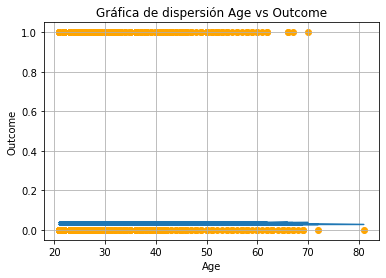

In [18]:
plt.scatter(diabetes["Age"],diabetes["Outcome"],c="orange")
plt.plot(diabetes["Age"], b0+b1*diabetes["Outcome"])
plt.title("Gráfica de dispersión Age vs Outcome")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.grid()
plt.show

In [19]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_train = np.array(diabetes['Age']).reshape((-1, 1))
Y_train = np.array(diabetes['Outcome'])

# creando modelo
model = LogisticRegression()
model.fit(X_train, Y_train)

# imprimiendo parametros usando el atributo coef_ e intercept_
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

# considero que la diferencia entre este coeficiente y el de regresión lineal radica en que el número de ejecuciones de procesos es mucho menor al usar este código que 
# haciendo código para cada uno de los procesos necesarios para la regresión logística, por lo tanto es un método más efectivo y confiable

intercepto (b): [-2.04744865]
pendiente (w): [[0.04202466]]


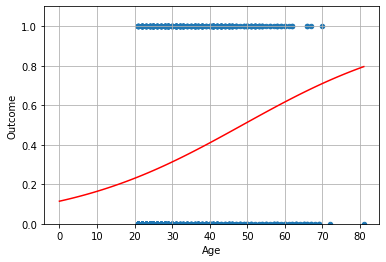

In [20]:
w = 0.04202466
b = -2.04744865
# puntos de la recta
x = np.linspace(0,diabetes['Age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
diabetes.plot.scatter(x='Age',y='Outcome')
plt.plot(x, y, '-r')
plt.ylim(0,diabetes['Outcome'].max()*1.1)
# plt.grid()
plt.grid()
plt.show()

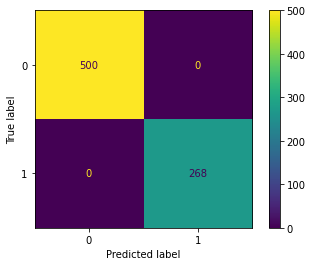

In [49]:


import sklearn.metrics
mc=sklearn.metrics.confusion_matrix(diabetes.Outcome,diabetes.Outcome)
vis = sklearn.metrics.ConfusionMatrixDisplay(mc)
vis.plot()